In [257]:
import numpy as np
import pandas as pd
import glob
from skimage import io
from skimage.io import imread
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing, linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [258]:
!unzip -q 'Group_5.zip'

replace Group_5/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [259]:
def convert_to_csv(dataset_folder):
    image_paths = glob.glob(dataset_folder + '/*/*/*.JPEG')
    #print(image_paths)
    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)

        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])

    img_r = imread(image_paths[0])
    column_names = [f"pixel_{x}" for x in range(np.prod(img_r.shape))] + ['label']

    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(dataset_folder+'/train.csv', index=False)
    test_df.to_csv(dataset_folder+'/test.csv', index=False)
convert_to_csv('Group_5')

In [260]:
df_train = pd.read_csv('Group_5/train.csv')

In [261]:
df_train.shape

(2150, 12289)

In [262]:
df_train.describe()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
count,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,...,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,121.001395,123.665116,119.974884,121.643256,124.518140,120.577674,121.263256,123.980930,120.288372,122.363256,...,102.592093,117.344186,114.292093,103.324186,117.983721,114.721395,104.189302,118.541395,115.437209,104.839070
std,82.222686,81.496630,87.522539,81.079873,80.521499,87.177254,81.030184,80.207265,86.800250,80.958777,...,76.243442,74.966272,73.308233,76.878416,75.810325,74.234458,77.730195,75.806849,74.202655,77.739451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,52.000000,37.000000,49.250000,55.000000,39.000000,50.000000,55.000000,39.000000,50.000000,...,36.000000,54.000000,52.000000,36.000000,55.000000,52.000000,37.000000,54.000000,54.000000,35.000000
50%,114.000000,119.000000,112.000000,114.000000,120.000000,113.000000,114.000000,119.000000,113.000000,117.000000,...,90.000000,114.000000,109.500000,92.000000,113.000000,108.000000,91.500000,114.000000,110.500000,94.000000
75%,191.000000,192.000000,203.000000,190.000000,193.000000,204.000000,188.000000,191.000000,202.000000,191.000000,...,160.000000,174.000000,168.750000,162.000000,178.000000,170.000000,163.000000,177.000000,170.000000,164.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [263]:
df_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,3,1,4,2,0,3,2,0,1,2,...,196,201,204,195,200,203,189,194,197,projectile
1,220,225,221,205,210,206,169,171,166,147,...,88,90,79,83,85,74,22,24,13,projectile
2,141,173,212,141,173,212,141,173,212,141,...,0,8,8,8,24,24,3,19,19,projectile
3,180,165,50,183,167,56,185,163,64,198,...,46,37,30,20,12,9,46,41,38,projectile
4,5,5,3,122,122,120,125,125,123,120,...,141,105,69,146,106,70,142,102,66,projectile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,77,90,107,223,238,255,220,235,255,206,...,23,24,18,74,76,73,16,18,15,fence
2146,146,145,150,167,166,171,15,14,19,13,...,167,177,187,166,176,186,166,176,186,fence
2147,38,108,178,39,108,177,42,107,173,44,...,175,176,181,238,241,246,226,229,234,fence
2148,50,50,38,48,48,36,36,37,23,29,...,80,75,56,36,29,10,40,33,14,fence


In [264]:
unique_labels = df_train["label"].unique()
print("Total unique labels =",len(unique_labels))
print(unique_labels)

print(df_train.label.value_counts())

Total unique labels = 5
['projectile' 'pill-bottle' 'reel' 'snail' 'fence']
projectile     500
pill-bottle    500
fence          500
snail          400
reel           250
Name: label, dtype: int64


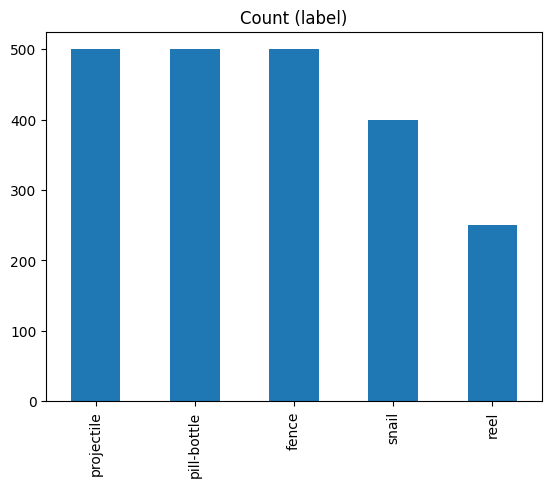

In [265]:
df_train.label.value_counts().plot(kind='bar', title='Count (label)');

In [266]:
df_test = pd.read_csv('Group_5/test.csv')

df_test.shape
print()
print(df_test.label.value_counts())


projectile     50
pill-bottle    50
reel           50
snail          50
fence          50
Name: label, dtype: int64


<Axes: title={'center': 'Count (label)'}>

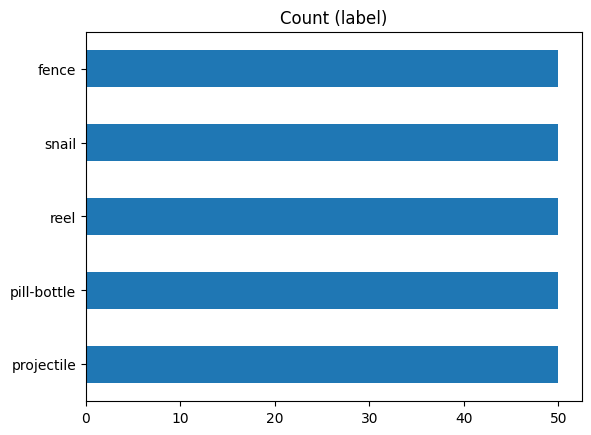

In [267]:
df_test.label.value_counts().plot(kind='barh', title='Count (label)')

In [268]:
lab = LabelEncoder()
lab.fit(df_train["label"])
labels = lab.classes_
new_label_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))
print('Mapping:', new_label_mapping)
df_train["label"] = lab.transform(df_train["label"])
df_test["label"] = lab.transform(df_test["label"])

Mapping: {'fence': 0, 'pill-bottle': 1, 'projectile': 2, 'reel': 3, 'snail': 4}


In [269]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train["label"]

X_test= df_test.drop(['label'], axis=1)
y_test= df_test["label"]

In [270]:
X_train_scaled = preprocessing.minmax_scale(X_train)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

In [271]:
X_test_scaled = preprocessing.minmax_scale(X_test)

# X_test_scaled = scaler.transform(X_test)

In [272]:
model = linear_model.LogisticRegression(C=1, fit_intercept=True,solver='lbfgs', max_iter=190)

model = model.fit(X_train_scaled, y_train)

train_predict = model.predict(X_train_scaled)
y_predict = model.predict(X_test_scaled)

acc_training = np.mean(y_train == train_predict)*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

mse_train = np.mean((y_train - train_predict)**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy (%) = 99.11627906976744
Testing accuracy (%) = 29.599999999999998
MSE on training data= 0.03441860465116279
MSE on testing data= 4.248


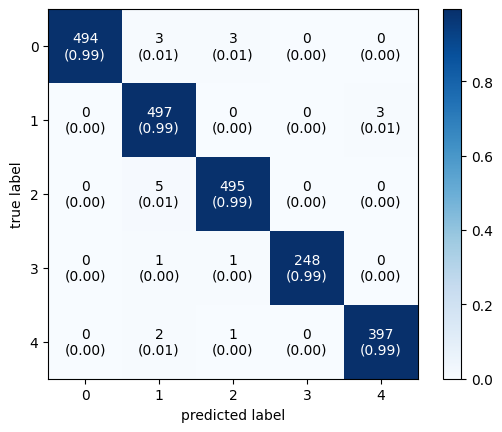

In [276]:
cnf_matrix=confusion_matrix(y_train,train_predict)
plot_confusion_matrix(conf_mat=cnf_matrix,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [277]:
def calc(cnf_matrix):

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    zero = np.array(0)
    zero = zero.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Precision or positive predictive value
    PPV = TP/(TP+FP)

    # Negative predictive value
    NPV = TN/(TN+FN)

    # F1 Score
    F1 = 2*((PPV)*(TPR)/(PPV + TPR))

    return TPR, TNR, PPV, NPV, F1

TPR, TNR, PPV, NPV, F1 = calc(cnf_matrix)

In [278]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]
t2 = []
t_ML2=[]
t_ML2_v2=[]

def formTable(a):
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    elif i == 1:
      second.append(round(a[i],2))
    elif i == 2:
      third.append(round(a[i],2))
    elif i == 3:
      fourth.append(round(a[i],2))
    elif i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t2.append(first)
t2.append(second)
t2.append(third)
t2.append(fourth)
t2.append(fifth)

In [279]:
data2 = pd.DataFrame(t2, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4'])
print(data2)

   Sensitivity  Specificity   PPV  NPV  F1 Score
0         0.99         1.00  1.00  1.0      0.99
1         0.99         0.99  0.98  1.0      0.99
2         0.99         1.00  0.99  1.0      0.99
3         0.99         1.00  1.00  1.0      1.00
4         0.99         1.00  0.99  1.0      0.99


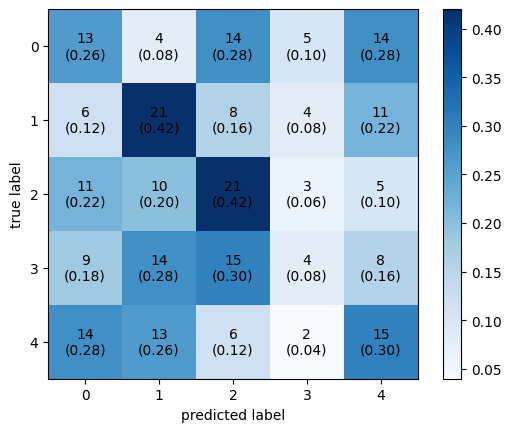

In [280]:
#confusion matrix

cnf_matrix_test=confusion_matrix(y_test,y_predict)
plot_confusion_matrix(conf_mat=cnf_matrix_test,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [281]:
TPR2, TNR2, PPV2, NPV2, F12 = calc(cnf_matrix_test)

In [282]:
first = []
second = []
third = []
fourth = []
fifth = []

def formTable(a):
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    elif i == 1:
      second.append(round(a[i],2))
    elif i == 2:
      third.append(round(a[i],2))
    elif i == 3:
      fourth.append(round(a[i],2))
    elif i == 4:
      fifth.append(round(a[i],2))

formTable(TPR2)
formTable(TNR2)
formTable(PPV2)
formTable(NPV2)
formTable(F12)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)

In [283]:
data = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4'])
print(data)

   Sensitivity  Specificity   PPV   NPV  F1 Score
0         0.26         0.80  0.25  0.81      0.25
1         0.42         0.80  0.34  0.85      0.38
2         0.42         0.78  0.33  0.84      0.37
3         0.08         0.93  0.22  0.80      0.12
4         0.30         0.81  0.28  0.82      0.29


# Neural Network

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [285]:
X_train_scaled_NN = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_scaled_NN = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

In [286]:
# Convert the target to one-hot encoding
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

print("Shape of X =", X_train_scaled_NN.shape)
print("Shape of y =", y_train.shape)

Shape of X = (2150, 12288)
Shape of y = (2150, 5)


In [287]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(256, activation='sigmoid') ) #hidden layer
model.add( Dense(128, activation='sigmoid') ) #hidden layer
model.add( Dense(128, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [288]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

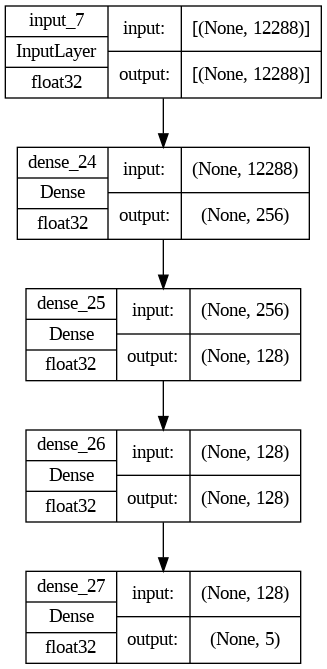

In [289]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [290]:
model.fit(X_train_scaled_NN, y_train, epochs=100, verbose=1)

Epoch 1/100
68/68 [==============================] - 2s 7ms/step - loss: 1.5942 - accuracy: 0.2335
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 1.5757 - accuracy: 0.2647
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 1.5474 - accuracy: 0.3102
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 1.5250 - accuracy: 0.3200
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 1.5233 - accuracy: 0.3214
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 1.4961 - accuracy: 0.3572
Epoch 7/100
68/68 [==============================] - 0s 7ms/step - loss: 1.4866 - accuracy: 0.3386
Epoch 8/100
68/68 [==============================] - 0s 5ms/step - loss: 1.4864 - accuracy: 0.3367
Epoch 9/100
68/68 [==============================] - 0s 5ms/step - loss: 1.4782 - accuracy: 0.3498
Epoch 10/100
68/68 [==============================] - 0s 5ms/step - loss: 1.4718 - accuracy: 0.3521
Epoch 11/

In [291]:
y_pred = model.predict(X_test_scaled_NN)

8/8 [==============================] - 0s 5ms/step


In [292]:
y_predicted = np.argmax(y_pred, axis=1)

In [293]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [294]:
nn_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", nn_testing)

Testing accuracy (%) = 38.4


In [295]:
# loss_test, pred_test = model.evaluate(X_test_scaled, y_test)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 5ms/step - loss: 1.5825 - accuracy: 0.3840
Testing accuracy (%) = 0.3840000033378601


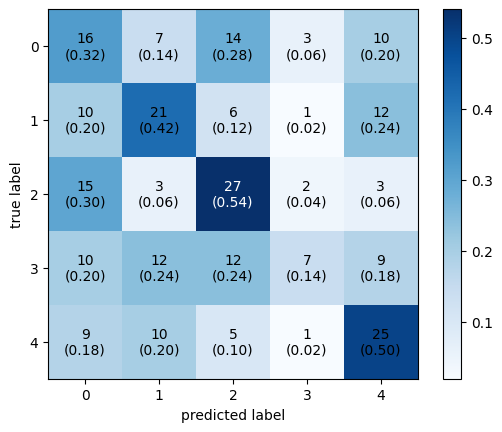

In [296]:
cnf_matrix_ML2=confusion_matrix(y_actual,y_predicted)
plot_confusion_matrix(conf_mat=cnf_matrix_ML2,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [297]:
TPR_ML2, TNR_ML2, PPV_ML2, NPV_ML2, F1_ML2 = calc(cnf_matrix_ML2)

In [298]:
first = []
second = []
third = []
fourth = []
fifth = []

formTable(TPR_ML2)
formTable(TNR_ML2)
formTable(PPV_ML2)
formTable(NPV_ML2)
formTable(F1_ML2)

t_ML2.append(first)
t_ML2.append(second)
t_ML2.append(third)
t_ML2.append(fourth)
t_ML2.append(fifth)

In [299]:
df_ML2 = pd.DataFrame(t_ML2, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4'])
print(df_ML2)

   Sensitivity  Specificity   PPV   NPV  F1 Score
0         0.32         0.78  0.27  0.82      0.29
1         0.42         0.84  0.40  0.85      0.41
2         0.54         0.82  0.42  0.88      0.47
3         0.14         0.96  0.50  0.82      0.22
4         0.50         0.83  0.42  0.87      0.46


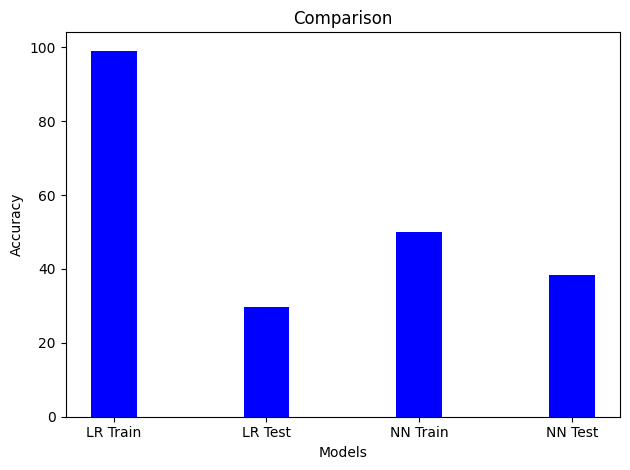

In [300]:
import matplotlib.pyplot as plt

categories = ['LR Train', 'LR Test', 'NN Train', 'NN Test']
values = [acc_training, acc_testing, 50.00, nn_testing]

bar_width = 0.3
plt.bar(categories, values, width=bar_width, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison')

plt.tight_layout()
plt.show()